## Conexión a Google Drive

In [ ]:
## Conectar el notebook a googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Instalación **RoboFlow** y Configuración de la API


In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=df697931826c6662c1217a6d42ba6ea2f43e09cac8c787ee2d656b69282bdf07
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

In [ ]:
from roboflow import Roboflow

In [ ]:
#API Key RoboFlow
rf = Roboflow(api_key="b5lZRScZzn3NOPhMEVq2")

## Modelo de Identificación de Aisladores en una cadena de Aislamiento

In [ ]:
#Carga Modelo Identificación de Objetos (Aisladores en una Cadena)
project_identificacion = rf.workspace().project("estado-aisladores-en-lt")
model_identificacion = project_identificacion.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# infer on a local image
print(model_identificacion.predict("/content/drive/MyDrive/Colab Notebooks/Proyecto Final Maestría/imagenes_identificar/DJI_0149.JPG", confidence=40, overlap=30).json())


{'predictions': [{'x': 4368, 'y': 2465, 'width': 987, 'height': 525, 'confidence': 0.926052987575531, 'class': 'Aislador', 'image_path': '/content/drive/MyDrive/Colab Notebooks/Proyecto Final Maestría/imagenes_identificar/DJI_0149.JPG', 'prediction_type': 'ObjectDetectionModel'}, {'x': 4375, 'y': 3510, 'width': 1075, 'height': 459, 'confidence': 0.9251696467399597, 'class': 'Aislador', 'image_path': '/content/drive/MyDrive/Colab Notebooks/Proyecto Final Maestría/imagenes_identificar/DJI_0149.JPG', 'prediction_type': 'ObjectDetectionModel'}, {'x': 4375, 'y': 1148, 'width': 875, 'height': 496, 'confidence': 0.9238519668579102, 'class': 'Aislador', 'image_path': '/content/drive/MyDrive/Colab Notebooks/Proyecto Final Maestría/imagenes_identificar/DJI_0149.JPG', 'prediction_type': 'ObjectDetectionModel'}, {'x': 4368, 'y': 2981, 'width': 1037, 'height': 506, 'confidence': 0.922151505947113, 'class': 'Aislador', 'image_path': '/content/drive/MyDrive/Colab Notebooks/Proyecto Final Maestría

In [ ]:
# visualize your prediction (guardado)
##,
                             confidence=40, overlap=30).save("/content/drive/MyDrive/Colab Notebooks/Proyecto Final Maestría/imagenes_identificar/prediction.jpg")


Extracción de ímagenes a partir de los Bounding Boxes de modelos de identificación

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
image_path="/content/drive/MyDrive/Colab Notebooks/Proyecto Final Maestría/imagenes_identificar/DJI_0149.JPG"

In [ ]:
bounding_boxes_dict = model_identificacion.predict("/content/drive/MyDrive/Colab Notebooks/Proyecto Final Maestría/imagenes_identificar/DJI_0149.JPG", confidence=40, overlap=30).json()

In [ ]:
import json

In [ ]:
json_data = json.dumps(bounding_boxes_dict)

In [ ]:
# Cargar los bounding boxes desde el JSON
data = json.loads(json_data)
bounding_boxes = data["predictions"]

In [ ]:
# Cargar la imagen desde la ruta
original_image = Image.open(image_path)

In [ ]:
import os

In [ ]:

output_folder = "/content/drive/MyDrive/Colab Notebooks/Proyecto Final Maestría/imagenes_recortadas/"

# Eliminar el contenido de la carpeta antes de guardar nuevas regiones
for file_name in os.listdir(output_folder):
    file_path = os.path.join(output_folder, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)

# Iterar a través de los bounding boxes y extraer las regiones (Cada plato de aislamiento)
for i, bbox in enumerate(bounding_boxes, start=1):
    x, y, width, height = bbox["x"], bbox["y"], bbox["width"], bbox["height"]

    # Extraer la región delimitada por el bounding box
    region = original_image.crop((x - width/2, y- height/2, x + width/2, y + height/2))

    # Guardar la región extraída como una nueva imagen
    region_filename = f"region_{i}.jpg"
    region.save(output_folder + region_filename)

# Cerrar la imagen original
original_image.close()
region.close()

## Segmentación de los Aisladores usando Segment Anything By Meta.

####Environment Set-up

In [ ]:
using_colab = True

In [ ]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

    !mkdir images
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-bj5nm1yc
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-bj5nm1yc
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=c4adb248a92f50250628f8c8933977e45b6e39060106392ceb5249a42d96da25
  Stored in directory: /tmp/pip-ephem-wheel-cache-imxrxvas/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2023-08-22 13:07:23--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.c

#### Set-up

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.8])
        ##color = np.array([0, 0, 0, 0.6]) #mascara en negro
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

#### Load Images

In [ ]:
image = cv2.imread('images/region_1.jpg')

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

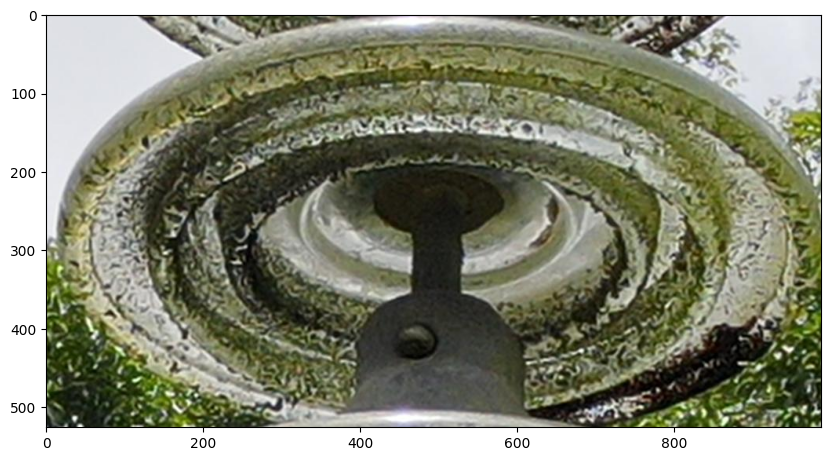

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

#### Selecting objects with SAM

load the SAM model and predictor

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

Process the image to produce an image embedding by calling SamPredictor.set_image.

In [ ]:
predictor.set_image(image)

To select the isolator, choose a point on it. Points are input to the model in (x,y) format and come with labels 1 (foreground point) or 0 (background point). Multiple points can be input.

In [ ]:
# Obtener las dimensiones de la imagen
height, width, _ = image.shape

    # Calcular el punto medio en las coordenadas (X, Y)
mid_x = width/2
mid_y = height/4

In [ ]:
input_point = np.array([[mid_x, mid_y]])
input_label = np.array([1])

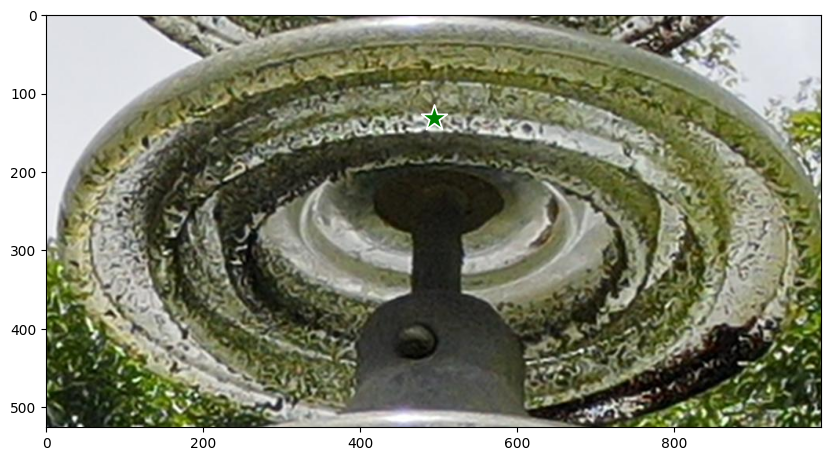

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

Predict with SamPredictor.predict. The model returns masks, quality predictions for those masks, and low resolution mask logits that can be passed to the next iteration of prediction.

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

With multimask_output=True (the default setting), SAM outputs 3 masks, where scores gives the model's own estimation of the quality of these masks. This setting is intended for ambiguous input prompts, and helps the model disambiguate different objects consistent with the prompt. When False, it will return a single mask. For ambiguous prompts such as a single point, it is recommended to use multimask_output=True even if only a single mask is desired; the best single mask can be chosen by picking the one with the highest score returned in scores. This will often result in a better mask.

In [ ]:
masks.shape  # (number_of_masks) x H x W

(1, 526, 988)

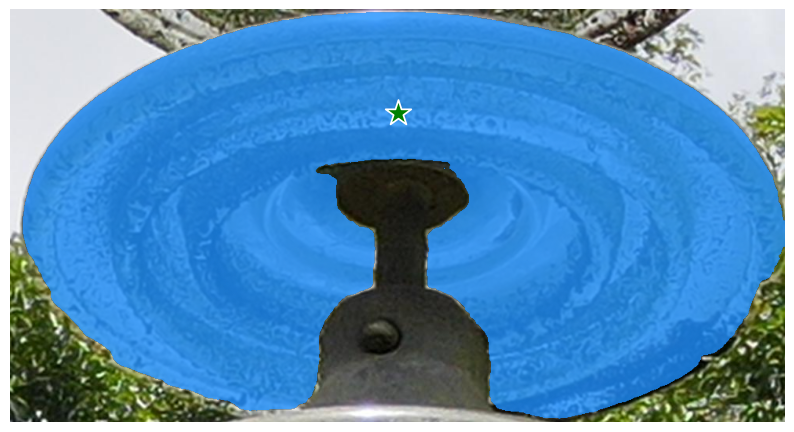

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

In [ ]:
image.shape

(526, 988, 3)

In [ ]:
mask = np.uint8(masks)

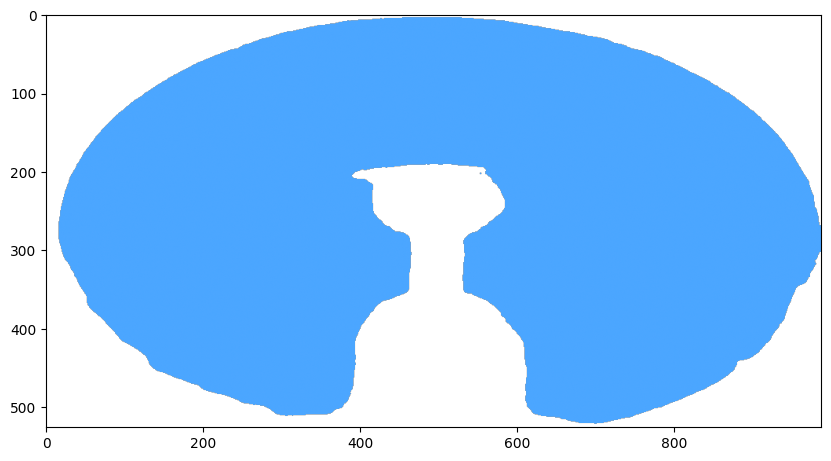

In [ ]:
plt.figure(figsize=(10,10))
show_mask(mask, plt.gca())

In [ ]:
mask[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# Ajustar el tamaño de la máscara para que coincida con las dimensiones de la imagen
mask_resized = cv2.resize(mask[0], (image.shape[1], image.shape[0]))

In [ ]:
mask_resized.shape

(526, 988)

In [ ]:
image.shape

(526, 988, 3)

In [ ]:
##################### PRUEBAS CODIGO NO FUNCIONA########

In [ ]:
# Asegurarse de que la máscara tenga tres canales (RGB)
#### REVISAR, ESTA QUEDANDO BGR Y NO RGB
mask_resized_rgb = cv2.cvtColor(mask_resized, cv2.COLOR_GRAY2RGB)

In [ ]:
mask_resized_rgb.shape

(526, 988, 3)

In [ ]:
mask_resized_rgb[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [ ]:
mask_resized_hsv = cv2.cvtColor(mask_resized_rgb, cv2.COLOR_BGR2HSV)

In [ ]:
mask_resized_hsv.shape

(526, 988, 3)

In [ ]:
def check_image_format(image):
    # Verificar si la imagen tiene tres canales (BGR o RGB)
    if len(image.shape) == 3 and image.shape[2] == 3:
        if image[0, 0, 0] == image[0, 0, 2]:
            return "BGR"
        elif image[0, 0, 0] == image[0, 0, 0]:
            return "RGB"
    return "Desconocido"

In [ ]:
check_image_format(image)

'RGB'

In [ ]:
#### QUE IMPLICA ESTE FORMATO??????

check_image_format(mask_resized_rgb)

'BGR'

In [ ]:
check_image_format(mask)

'Desconocido'

In [ ]:
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

In [ ]:
check_image_format(image_bgr)

'RGB'

In [ ]:
##################### HASTA ACA CODIGO DE PRUEBA  ########

In [ ]:
##funciona solo usando la máscara "mask_resized" pero no cuando la pongo en 3 canales (RGB) (mask_resized_rgb)
## En este caso extrae la imágen segmentada en escala de Grises.

# Aplicar la máscara a la imagen original
segmented_image = cv2.bitwise_and(image, image, mask=mask_resized)


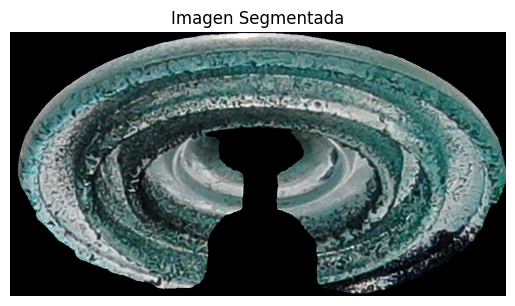

In [ ]:
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')
plt.show()

In [ ]:
# Guardar la imagen segmentada
segmented_image_path = 'imagen_segmentada.jpg'
cv2.imwrite(segmented_image_path, segmented_image)


True

## Modelo de Clasificación de Aisladores Segmentados según su estado

In [ ]:
project = rf.workspace().project("clasificacion-del-ailamiento-en-lt")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# infer on a local image
print(model.predict("imagen_segmentada.jpg").json())

# infer on an image hosted elsewhere
#print(model.predict("URL_OF_YOUR_IMAGE", hosted=True).json())

# save an image annotated with your predictions
#model.predict("your_image.jpg").save("prediction.jpg")

{'predictions': [{'time': 0.13342291599974487, 'image': {'width': 988, 'height': 526}, 'predictions': [{'class': 'Anomalia', 'confidence': 0.6784}, {'class': 'Normal', 'confidence': 0.3216}], 'top': 'Anomalia', 'confidence': 0.6784, 'image_path': 'imagen_segmentada.jpg', 'prediction_type': 'ClassificationModel'}], 'image': (988, 526)}
